# Performance Metrics Hands-On Exercise

This hands-on exercise encourages the utilization of different evaluation metrics using this dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Instructions:
 1. Fork the given repository
 2. Rename 'Exercise.ipynb' to '( lastname ).ipynb'
 3. Load the given dataset
 4. For No. 2-4, preprocess the dataset then construct, train, and evaluate a **classification** model (You may experiment in this step)
 5. For No. 5-7, preprocess the dataset then construct, train, and evaluate a **regression** model (You may experiment in this step)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, mean_absolute_error

### 1. Load the Data

In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 2. Preprocess the Data (Classification)

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_data = ['address', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic']

for col in categorical_data:
    df[col] = label_encoder.fit_transform(df[col])

In [4]:
# Features and target variable
X1 = df.drop(['school'], axis=1)
y1 = df['school']
label_mapping = {label: idx for idx, label in enumerate(y1.unique())}
y1 = y1.map(label_mapping)

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

### 3. Construct and Train the Model (Classification)

In [5]:
# Train the model - XGBoost
model1 = XGBClassifier(objective='multi:softmax', num_class=len(label_mapping))
model1.fit(X_train1, y_train1, verbose = 5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

### 4. Evaluate the Model (Classification)

In [6]:
# Evaluate the model
y_pred1 = model1.predict(X_test1)

# Accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print('XGBoost Classifier Classification Accuracy: ',  accuracy, '\n')

# classification report
print(classification_report(y_test1, y_pred1, digits=4))

XGBoost Classifier Classification Accuracy:  0.8607594936708861 

              precision    recall  f1-score   support

           0     0.8904    0.9559    0.9220        68
           1     0.5000    0.2727    0.3529        11

    accuracy                         0.8608        79
   macro avg     0.6952    0.6143    0.6375        79
weighted avg     0.8360    0.8608    0.8428        79



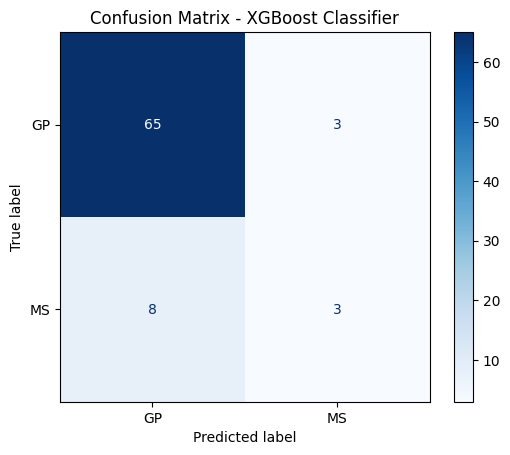

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.keys())
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

### 5. Preprocess the Data (Regression)

In [8]:
# Features and target variable
df['school'] = label_encoder.fit_transform(df['school'])
X2 = df.drop(['G3'], axis=1)
y2 = df['G3']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

# Standardize
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train2)
X_test_reg = scaler.transform(X_test2)

### 6. Construct and Train the Model (Regression)

In [9]:
# Train the model - XGBoost
model2 = XGBRegressor()
model2.fit(X_train2, y_train2, verbose = 5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 7. Evaluate the Model (Regression)

In [10]:
# Evaluate the model
y_pred2 = model2.predict(X_test2)

# Mean Squared Error
lr_mse = mean_squared_error(y_test2, y_pred2)
print('XGBoost Regressor Mean Squared Error: ', lr_mse)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test2, y_pred2)
print('XGBoost Regressor Mean Absolute Error: ', lr_mae)

XGBoost Regressor Mean Squared Error:  2.1000486589198992
XGBoost Regressor Mean Absolute Error:  0.9903510114814662


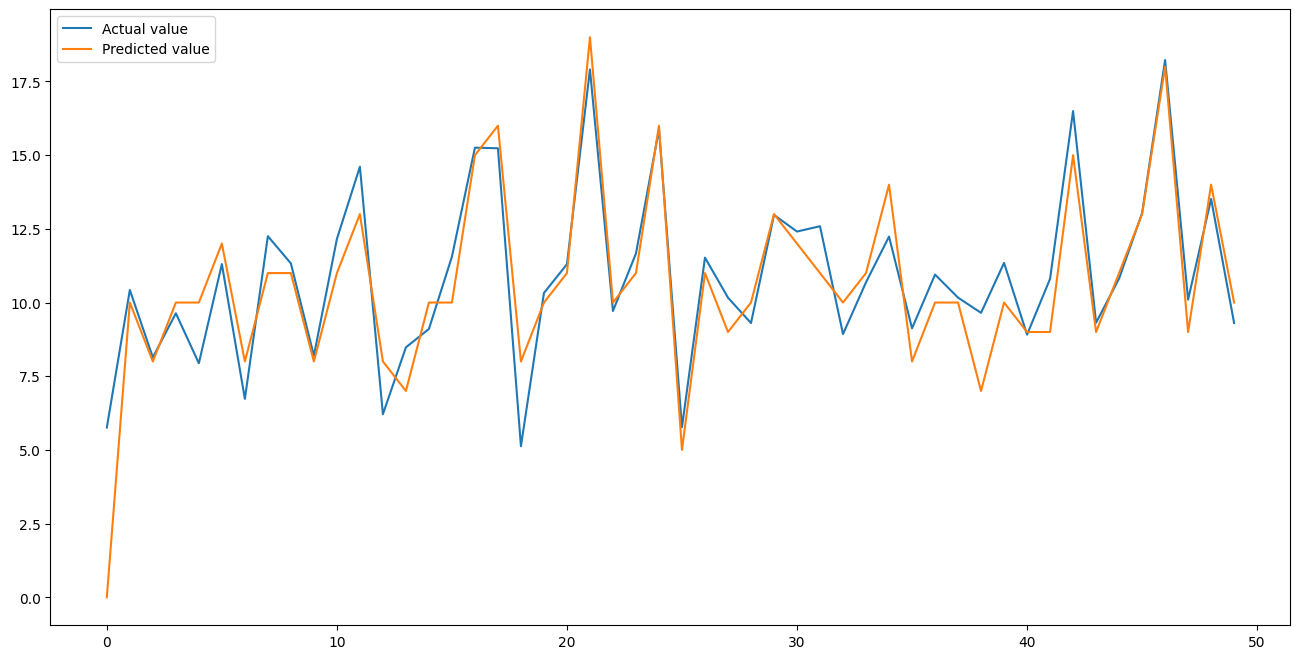

In [11]:
test = pd.DataFrame({'Predicted value': y_pred2, 'Actual value': y_test2})
fig = plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual value', 'Predicted value'])
plt.show()